In [44]:
from __future__ import print_function
import pandas as pd
import numpy as np
import json
import urllib2 
import sys
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
!ls $DFDATA/*/*csv # Find file directories to use as CUSP data facility is down

/gws/open/NYCOpenData/nycopendata/data/42et-jh9v/doe hsdirectory performance column description.csv
/gws/open/NYCOpenData/nycopendata/data/5uac-w243/NYPD_Incident_Level_Data_Column_Descriptions.csv
/gws/open/NYCOpenData/nycopendata/data/c3uy-2p5r/OutdoorAirandHealthInfoSource.csv
/gws/open/NYCOpenData/nycopendata/data/eccv-9dzr/ARCHIVED_FHV_Bases_20170310.csv
/gws/open/NYCOpenData/nycopendata/data/fdkv-4t4z/ARCHIVED_NYC_Zoning_Tax_Lot_Database_03092017.csv
/gws/open/NYCOpenData/nycopendata/data/i9pf-sj7c/doe hsdirectory program column description.csv
/gws/open/NYCOpenData/nycopendata/data/nzjr-3966/Field_Descriptions.csv
/gws/open/NYCOpenData/nycopendata/data/qgea-i56i/NYPD_Incident_Level_Data_Column_Descriptions.csv
/gws/open/NYCOpenData/nycopendata/data/u553-m549/doe hsdirectory school column description.csv


#### 2.

In [48]:
os.getenv("DFDATA") # Check Directory is linked to correct place

'/gws/open/NYCOpenData/nycopendata/data'

#### 3.

In [95]:
# read data in Pandas
dataFHV = pd.read_csv(os.getenv('DFDATA')+'/eccv-9dzr/ARCHIVED_FHV_Bases_20170310.csv') 

#### 4.

In [96]:
dataFHV.head() #Render data

,Base License,Base Name,Base Phone,Street Hail Livery Endorsement,Wheelchair Accessible Vehicles,Base Type,Street Number,Street,City,State,Zip,Location,Longitude,Latitude
0,B01452,AREAS TRANSP INC,(718)967-3232,NO,0,LIVERY BASE,5230,ARTHUR KILL ROAD,STATEN ISLAND,NY,10307,"(40.515693, -74.24379)",-74.243790,40.515693
1,B00972,N.J.M.INC.,(718)967-2500,YES,0,LIVERY BASE,566,INDUSTRIAL LOOP,STATEN ISLAND,NY,10309,"(40.547111, -74.230602)",-74.230602,40.547111
2,B00023,F.J.A. LIVERY CORP,(718)698-4493,NO,0,LIVERY BASE,3747A,VICTORY BOULEVARD,STATEN ISLAND,NY,10314,"(40.597937, -74.180879)",-74.180879,40.597937
3,B01537,S.I. SPEED INC.,(718)227-6666,YES,0,LIVERY BASE,16,GIFFORDS LANE,STATEN ISLAND,NY,10308,"(40.551166, -74.150331)",-74.150331,40.551166
4,B02028,FOREST AVENUE CAR SERVICE INC,(718)981-4400,NO,0,LIVERY BASE,1841,FOREST AVENUE,STATEN ISLAND,NY,10303,"(40.625268, -74.150026)",-74.150026,40.625268


#### 5.

In [97]:
# Drop all irrelevant columns
dataFHV.drop(['Base License', 'Base Name', 'Base Phone', 'Street Hail Livery Endorsement', 'Wheelchair Accessible Vehicles',
              'Base Type', 'Street Number', 'Street', 'City', 'State', 'Zip', 'Location'], 
                axis=1, inplace=True)

#### 6.

In [98]:
dataFHV.head() # Rerender data

,Longitude,Latitude
0,-74.243790,40.515693
1,-74.230602,40.547111
2,-74.180879,40.597937
3,-74.150331,40.551166
4,-74.150026,40.625268


(40.4, 41)

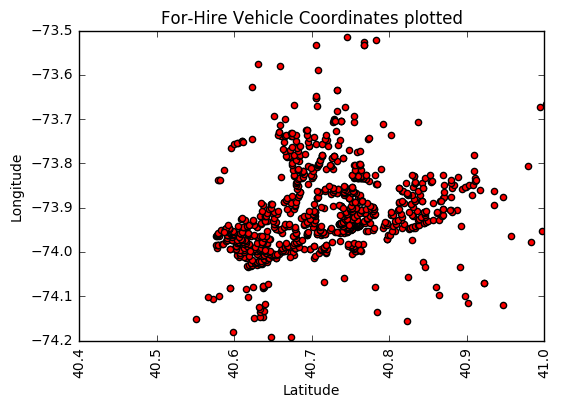

In [103]:
# Plot latitude and longitude to see where FHVs are
figure = dataFHV.plot.scatter(x='Latitude', y='Longitude', color='r',rot=90)

# Format the figure
figure.set_title("For-Hire Vehicle Coordinates plotted")
figure.set_ylim(-74.2, -73.5)
figure.set_xlim(40.4, 41)

##### Figure 1: For-Hire Vehicle (FHV) Coordinates plotted

### Cannot do extra credit because none of the available files while CDF is down have any date variables